# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc,y_label):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## categorical_crossentropy

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.2, 
                          epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 17s 424us/step - loss: 1.8130 - acc: 0.3422 - val_loss: 1.6136 - val_acc: 0.4566
Epoch 2/10
40000/40000 [==============================] - 14s 351us/step - loss: 1.4480 - acc: 0.4795 - val_loss: 1.3833 - val_acc: 0.5393
Epoch 3/10
40000/40000 [==============================] - 14s 360us/step - loss: 1.2952 - acc: 0.5389 - val_loss: 1.3035 - val_acc: 0.5817
Epoch 4/10
40000/40000 [==============================] - 14s 353us/step - loss: 1.1893 - acc: 0.5798 - val_loss: 1.2174 - val_acc: 0.6131
Epoch 5/10
40000/40000 [==============================] - 14s 354us/step - loss: 1.1039 - acc: 0.6081 - val_loss: 1.1545 - val_acc: 0.6294
Epoch 6/10
40000/40000 [==============================] - 16s 394us/step - loss: 1.0348 - acc: 0.6338 - val_loss: 1.1142 - val_acc: 0.6270
Epoch 7/10
40000/40000 [==============================] - 16s 396us/

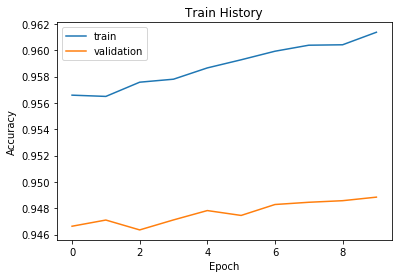

In [39]:
show_train_history('acc', 'val_acc', 'Accuracy')

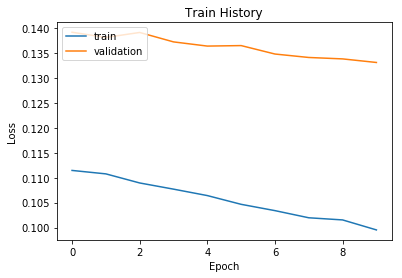

In [40]:
show_train_history('loss', 'val_loss', 'Loss')

In [26]:
model.evaluate(x_img_test_normalize, y_label_test_OneHot)

10000/10000 [==============================] - 1s 62us/step


[0.9602674827575683, 0.6776]

## mse

In [27]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 357us/step - loss: 0.0353 - acc: 0.7459 - val_loss: 0.0420 - val_acc: 0.7088
Epoch 2/10
40000/40000 [==============================] - 14s 345us/step - loss: 0.0345 - acc: 0.7526 - val_loss: 0.0419 - val_acc: 0.7077
Epoch 3/10
40000/40000 [==============================] - 14s 349us/step - loss: 0.0342 - acc: 0.7557 - val_loss: 0.0415 - val_acc: 0.7088
Epoch 4/10
40000/40000 [==============================] - 14s 346us/step - loss: 0.0337 - acc: 0.7599 - val_loss: 0.0412 - val_acc: 0.7128
Epoch 5/10
40000/40000 [==============================] - 14s 353us/step - loss: 0.0334 - acc: 0.7615 - val_loss: 0.0410 - val_acc: 0.7154
Epoch 6/10
40000/40000 [==============================] - 16s 397us/step - loss: 0.0330 - acc: 0.7640 - val_loss: 0.0410 - val_acc: 0.7115
Epoch 7/10
40000/40000 [==============================] - 14s 362us/step - loss: 0.0327 - acc: 0.7662 - val_loss: 0.

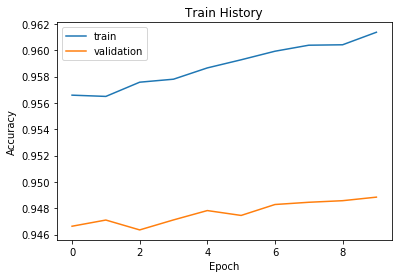

In [41]:
show_train_history('acc', 'val_acc', 'Accuracy')

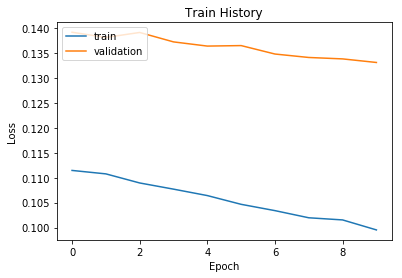

In [42]:
show_train_history('loss', 'val_loss', 'Loss')

In [30]:
model.evaluate(x_img_test_normalize, y_label_test_OneHot)

10000/10000 [==============================] - 1s 98us/step


[0.04114312610030174, 0.7093]

## binary_crossentropy

In [31]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 17s 417us/step - loss: 0.1115 - acc: 0.9566 - val_loss: 0.1392 - val_acc: 0.9466
Epoch 2/10
40000/40000 [==============================] - 15s 381us/step - loss: 0.1108 - acc: 0.9565 - val_loss: 0.1382 - val_acc: 0.9471
Epoch 3/10
40000/40000 [==============================] - 15s 374us/step - loss: 0.1090 - acc: 0.9576 - val_loss: 0.1392 - val_acc: 0.9463
Epoch 4/10
40000/40000 [==============================] - 16s 400us/step - loss: 0.1077 - acc: 0.9578 - val_loss: 0.1373 - val_acc: 0.9471
Epoch 5/10
40000/40000 [==============================] - 15s 375us/step - loss: 0.1064 - acc: 0.9587 - val_loss: 0.1364 - val_acc: 0.9478
Epoch 6/10
40000/40000 [==============================] - 16s 395us/step - loss: 0.1047 - acc: 0.9593 - val_loss: 0.1365 - val_acc: 0.9474
Epoch 7/10
40000/40000 [==============================] - 15s 373us/step - loss: 0.1034 - acc: 0.9599 - val_loss: 0.

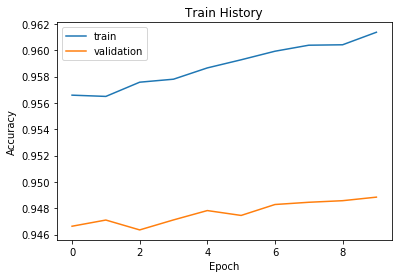

In [32]:
show_train_history('acc', 'val_acc', 'Accuracy')

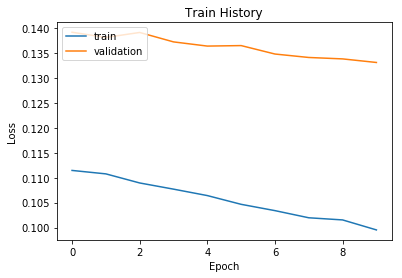

In [38]:
show_train_history('loss', 'val_loss', 'Loss')

In [34]:
model.evaluate(x_img_test_normalize, y_label_test_OneHot)

10000/10000 [==============================] - 1s 76us/step


[0.13452620830535889, 0.9480499927520752]